# Arbitrary value imputation 

**Definition**
  * Replacing missing data with arbitrary values defined by user (but the value is usually out of distribution. should not from the original distribution. e.g. 999 not 99)
    ![](images/arbitrary_value_imputation.png)

**Assumption**
  * Data is not missing at random 
  * If data is not missing at random, we want to flag the missing values with a different value

**Advantages**
  * Fast and easy to implement 
  * Captures the importanceof being missing

**Limitations**
  * Distortion of the original variable distribution 
  * Distortion of the original variance 
  * Distortion of the covariance within the remaining variables of the dataset 
  * If the arbitary value is at the end of the distribution it may mask or create outliers 
  * Need to be careful not to chose an arbitrary value too similar to the mean or median (or any other common value of the variable distribution) 
  * The more missing data, the higher the distortion 

**When to use**
  * Data is not missing at random 
  * Trees ok. linear models x. 

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# to split the datasets
from sklearn.model_selection import train_test_split

# to impute missing data 
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline 

In [2]:
cols = ['OverallQual', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea',
        'WoodDeckSF', 'BsmtUnfSF', 'LotFrontage', 'MasVnrArea', 'GarageYrBlt']
cols_to_import = cols + ['SalePrice']

In [3]:
df = pd.read_csv('../data/house_price/train.csv', usecols=cols_to_import)
df

,LotFrontage,OverallQual,MasVnrArea,BsmtUnfSF,TotalBsmtSF,1stFlrSF,GrLivArea,GarageYrBlt,WoodDeckSF,SalePrice
0,65.0,7,196.0,150,856,856,1710,2003.0,0,208500
1,80.0,6,0.0,284,1262,1262,1262,1976.0,298,181500
2,68.0,7,162.0,434,920,920,1786,2001.0,0,223500
3,60.0,7,0.0,540,756,961,1717,1998.0,0,140000
4,84.0,8,350.0,490,1145,1145,2198,2000.0,192,250000
...,...,...,...,...,...,...,...,...,...,...
1455,62.0,6,0.0,953,953,953,1647,1999.0,0,175000
1456,85.0,6,119.0,589,1542,2073,2073,1978.0,349,210000
1457,66.0,7,0.0,877,1152,1188,2340,1941.0,0,266500
1458,68.0,5,0.0,0,1078,1078,1078,1950.0,366,142125


In [4]:
# check missing data 
df.isnull().mean()

LotFrontage    0.177397
OverallQual    0.000000
MasVnrArea     0.005479
BsmtUnfSF      0.000000
TotalBsmtSF    0.000000
1stFlrSF       0.000000
GrLivArea      0.000000
GarageYrBlt    0.055479
WoodDeckSF     0.000000
SalePrice      0.000000
dtype: float64

Variable `LotFrontage`, `MasVnrArea`, and `GarageYrBlt` have missing values.

# Split data

In [5]:
X_train, X_test, y_train, y_test = train_test_split(df, 
                                                    df['SalePrice'],
                                                    test_size=0.3, 
                                                    random_state=0)

In [6]:
X_train.isnull().mean()

LotFrontage    0.184932
OverallQual    0.000000
MasVnrArea     0.004892
BsmtUnfSF      0.000000
TotalBsmtSF    0.000000
1stFlrSF       0.000000
GrLivArea      0.000000
GarageYrBlt    0.052838
WoodDeckSF     0.000000
SalePrice      0.000000
dtype: float64

# Explore data

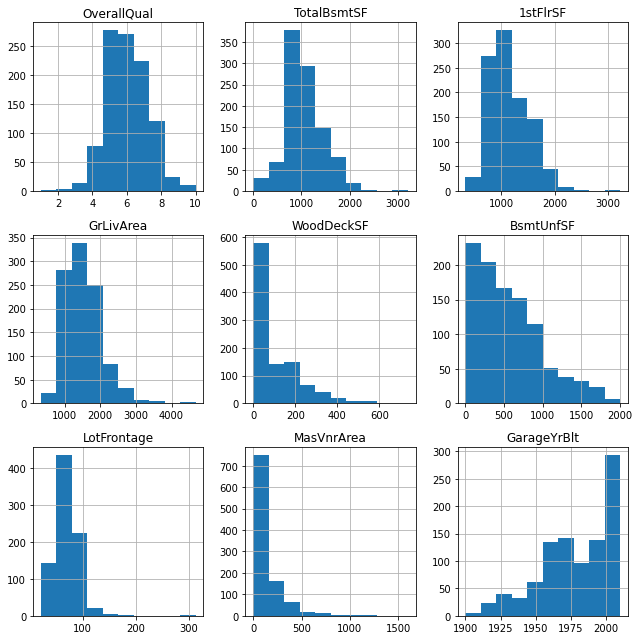

In [7]:
fig, axes = plt.subplots(3,3, figsize=(9, 9))

for i, col in enumerate(cols):
    ax = plt.subplot(3, 3, i+1)
    X_train[col].hist()
    plt.title(col)

plt.tight_layout()
plt.show()

In [8]:
# find mean and max of vairables we want to impute
temp = df[['LotFrontage', 'MasVnrArea', 'GarageYrBlt']]

pd.concat([temp.min(), temp.max()], axis=1, keys=['min', 'max'])

,min,max
LotFrontage,21.0,313.0
MasVnrArea,0.0,1600.0
GarageYrBlt,1900.0,2010.0


For `LotFrontage`, let's usage 999 our arbitrary value to fill.

# Impute missing data

In [9]:
# check missing data 
missing_idx = X_train[X_train.isnull().any(axis=1)].index
X_train.loc[missing_idx]

,LotFrontage,OverallQual,MasVnrArea,BsmtUnfSF,TotalBsmtSF,1stFlrSF,GrLivArea,GarageYrBlt,WoodDeckSF,SalePrice
64,NaN,7,573.0,318,1057,1057,2034,1998.0,576,219500
682,NaN,6,0.0,288,1291,1291,1291,1996.0,307,173000
960,50.0,5,0.0,162,858,858,858,NaN,117,116500
853,NaN,6,115.0,563,1127,1445,1445,1964.0,180,158000
1011,75.0,5,0.0,0,0,1664,1664,NaN,0,100000
...,...,...,...,...,...,...,...,...,...,...
537,NaN,4,0.0,264,864,864,864,1980.0,216,111250
705,70.0,4,0.0,0,0,372,1092,NaN,0,55000
1033,NaN,7,295.0,668,1654,1654,1654,2002.0,0,230000
1383,NaN,5,0.0,816,816,1416,1416,2007.0,0,112000


## (1) Pandas

In [10]:
# when there is no difference in columns
# df_filled = df.fillna(999)

# when specify columns
X_train_filled = X_train.fillna(value={'LotFrontage': 999})
X_train_filled.loc[missing_idx]

,LotFrontage,OverallQual,MasVnrArea,BsmtUnfSF,TotalBsmtSF,1stFlrSF,GrLivArea,GarageYrBlt,WoodDeckSF,SalePrice
64,999.0,7,573.0,318,1057,1057,2034,1998.0,576,219500
682,999.0,6,0.0,288,1291,1291,1291,1996.0,307,173000
960,50.0,5,0.0,162,858,858,858,NaN,117,116500
853,999.0,6,115.0,563,1127,1445,1445,1964.0,180,158000
1011,75.0,5,0.0,0,0,1664,1664,NaN,0,100000
...,...,...,...,...,...,...,...,...,...,...
537,999.0,4,0.0,264,864,864,864,1980.0,216,111250
705,70.0,4,0.0,0,0,372,1092,NaN,0,55000
1033,999.0,7,295.0,668,1654,1654,1654,2002.0,0,230000
1383,999.0,5,0.0,816,816,1416,1416,2007.0,0,112000


## (2) sklearn SimpleImputer

In [11]:
imputer = SimpleImputer(strategy='constant', fill_value=999)
imputer.fit(X_train)

SimpleImputer(fill_value=999, strategy='constant')

In [12]:
X_train_imputed = imputer.transform(X_train)

In [13]:
pd.DataFrame(X_train_imputed, columns=cols_to_import)

,OverallQual,TotalBsmtSF,1stFlrSF,GrLivArea,WoodDeckSF,BsmtUnfSF,LotFrontage,MasVnrArea,GarageYrBlt,SalePrice
0,999.0,7.0,573.0,318.0,1057.0,1057.0,2034.0,1998.0,576.0,219500.0
1,999.0,6.0,0.0,288.0,1291.0,1291.0,1291.0,1996.0,307.0,173000.0
2,50.0,5.0,0.0,162.0,858.0,858.0,858.0,999.0,117.0,116500.0
3,60.0,6.0,0.0,356.0,560.0,698.0,1258.0,1939.0,0.0,105000.0
4,60.0,2.0,0.0,0.0,290.0,438.0,438.0,1930.0,0.0,60000.0
...,...,...,...,...,...,...,...,...,...,...
1017,82.0,8.0,673.0,89.0,1252.0,1268.0,2365.0,1999.0,0.0,337000.0
1018,60.0,4.0,0.0,625.0,1067.0,1067.0,1067.0,1996.0,290.0,128000.0
1019,68.0,6.0,0.0,0.0,0.0,1318.0,1902.0,1978.0,0.0,112000.0
1020,999.0,7.0,18.0,1374.0,1374.0,1557.0,1557.0,2003.0,143.0,234000.0
